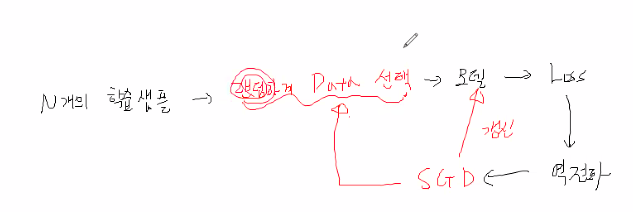

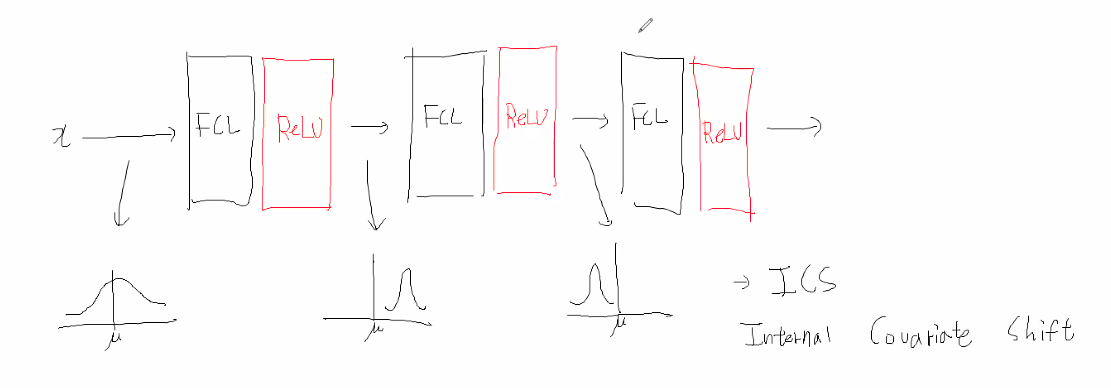

입력된 데이터가 정규분포였어도 relu때매 분포가 자꾸 바뀔수있다.
> 배치정규화 해줘야

covariate shift
- 노인으로학습하고 청년데이터맞춰바
- 페르시안고양이로 학습하고 러시안블루맞춰바느낌
feature들의 분포가 너무 차이나는거.

internal 붙으면 뉴런 지나갈때마다 분포 차이지리는거
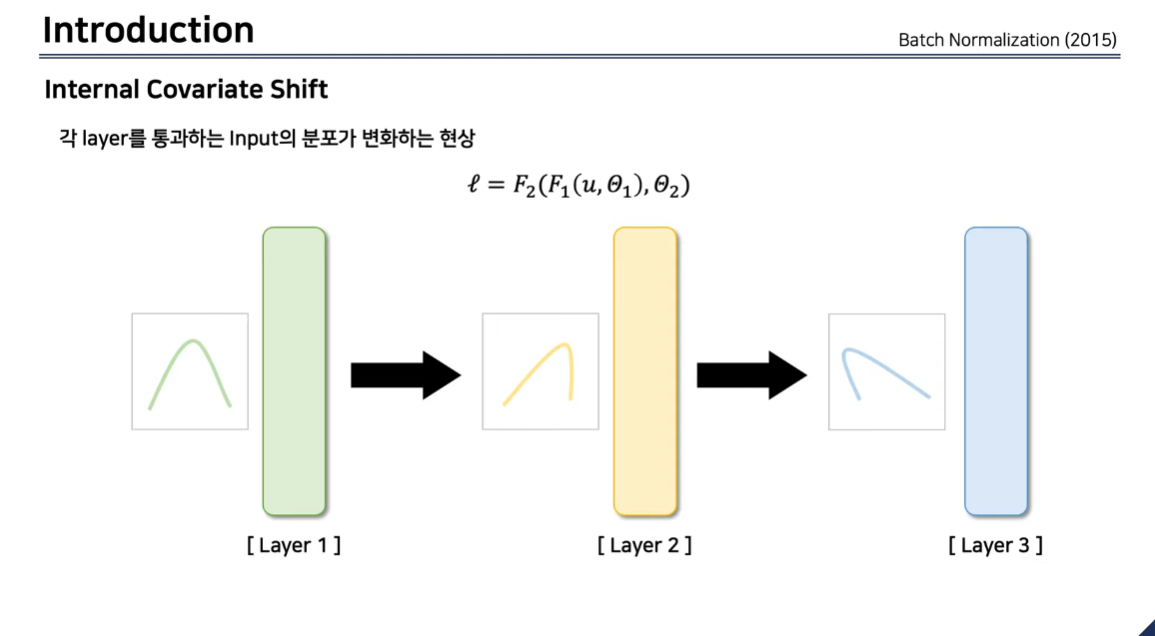

# 배치정규화
배치별 정규화 > 배치별(배치마다) 데이터의 분포를 일정하게 맞춰준다 > 평균과 분산을 일정하게

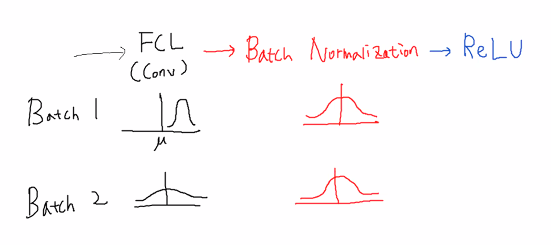

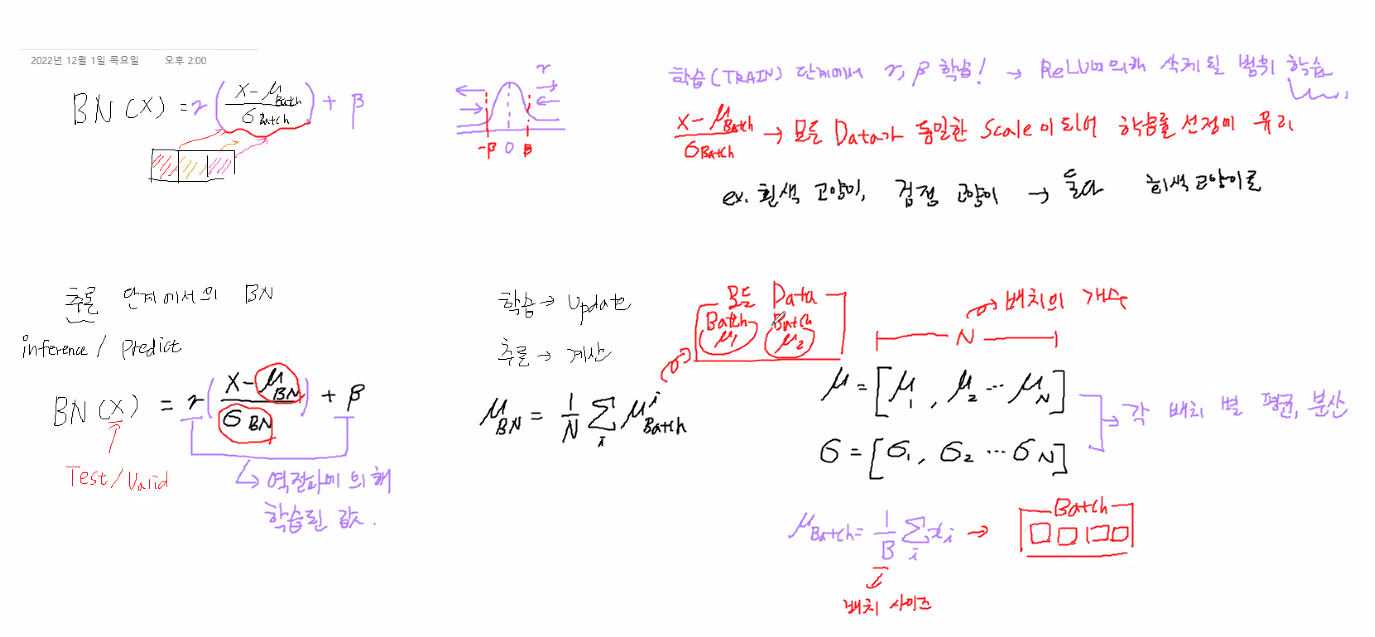

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

def preprocessing(images, labels):
  # 0 ~ 255 사이의 값을 0 ~ 1사이의 값으로 스케일링 해 주기 및 np.float32 형식으로 바꿔주기
  images = np.array(images / 255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32) # 레이블은 할 필요는 없지만 권장 하고 있다!

  return images, labels

(X_train, t_train), (X_test, t_test) = cifar10.load_data()

t_train = t_train.squeeze()
t_test  = t_test.squeeze()

LABEL_NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

X_train, t_train = preprocessing(X_train, t_train)
X_test, t_test   = preprocessing(X_test, t_test)

170498071/170498071 [==============================] - 14s 0us/step


# 배치 정규화를 이용한 모델링
- conv - BN - activation - pooling

In [ ]:
from re import X
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Flatten, Dense, MaxPooling2D, Dropout

# 입력층 정의
input = Input(shape=(32,32,3))

# feature extraction
x = Conv2D(filters=32, kernel_size=3, padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x) #Batch normalization이후에 걸어야하므로 따로써줘야!

x = Conv2D(filters=32, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x) #Batch normalization이후에 걸어야하므로 따로써줘야!

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x) #Batch normalization이후에 걸어야하므로 따로써줘야!

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# FCL
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x) # batch noramlization써도되고 안써도됨
x = Dropout(0.3)(x)


# 출력층
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input, outputs=output)
model.summary()


<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f7c80225970>>

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

history = model.fit(
    X_train, t_train,
    batch_size=64, epochs=30,
    validation_split=0.15
)

Epoch 1/30
665/665 [==============================] - 16s 10ms/step - loss: 1.5873 - acc: 0.4227 - val_loss: 1.3356 - val_acc: 0.5080
Epoch 2/30
665/665 [==============================] - 6s 10ms/step - loss: 1.1375 - acc: 0.5953 - val_loss: 1.5185 - val_acc: 0.5417
Epoch 3/30
665/665 [==============================] - 7s 10ms/step - loss: 0.9363 - acc: 0.6704 - val_loss: 0.9634 - val_acc: 0.6757
Epoch 4/30
665/665 [==============================] - 7s 10ms/step - loss: 0.8171 - acc: 0.7156 - val_loss: 0.8116 - val_acc: 0.7216
Epoch 5/30
665/665 [==============================] - 6s 10ms/step - loss: 0.7451 - acc: 0.7430 - val_loss: 0.7699 - val_acc: 0.7245
Epoch 6/30
665/665 [==============================] - 7s 10ms/step - loss: 0.6657 - acc: 0.7719 - val_loss: 0.8687 - val_acc: 0.7032
Epoch 7/30
665/665 [==============================] - 6s 10ms/step - loss: 0.6116 - acc: 0.7887 - val_loss: 0.7372 - val_acc: 0.7540
Epoch 8/30
665/665 [==============================] - 6s 10ms/step -